In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [50]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/eye_resize(224,224)/"
CATEGORIES = ["central", "hemianopia","normal","quadratopia","superior","turnel"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) )  # convert to array ,cv2.IMREAD_GRAYSCALE
        #plt.imshow(img_array, cmap='gray')  # graph it
        #plt.show()  # display!

        break  # we just want one for now so break
    break 

training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)  # convert to array ,cv2.IMREAD_GRAYSCALE
            new_array = cv2.resize(img_array, (32, 32))  # resize to normalize data size
            training_data.append([new_array, class_num])  # add this to our training_data

create_training_data()

print(len(training_data))



  0%|          | 0/402 [00:00<?, ?it/s]

  9%|▉         | 36/402 [00:00<00:01, 354.63it/s]

 18%|█▊        | 74/402 [00:00<00:00, 361.83it/s]

 29%|██▊       | 115/402 [00:00<00:00, 374.78it/s]

 38%|███▊      | 154/402 [00:00<00:00, 378.65it/s]

 48%|████▊     | 192/402 [00:00<00:00, 377.21it/s]

 57%|█████▋    | 231/402 [00:00<00:00, 380.73it/s]

 68%|██████▊   | 272/402 [00:00<00:00, 386.41it/s]

 78%|███████▊  | 312/402 [00:00<00:00, 389.59it/s]

 87%|████████▋ | 351/402 [00:00<00:00, 387.21it/s]

100%|██████████| 402/402 [00:01<00:00, 383.14it/s]


  0%|          | 0/408 [00:00<?, ?it/s]

 10%|█         | 41/408 [00:00<00:00, 408.16it/s]

 20%|██        | 82/408 [00:00<00:00, 407.24it/s]

 30%|███       | 124/408 [00:00<00:00, 410.14it/s]

 39%|███▉      | 161/408 [00:00<00:00, 396.33it/s]

 49%|████▉     | 201/408 [00:00<00:00, 396.62it/s]

 59%|█████▉    | 242/408 [00:00<00:00, 399.53it/s]

 69%|██████▉   | 281/408 [00:00<00:00, 394.53it/s]

 79%|███████▊  | 321/408 [00:00<00:

2348


In [89]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold

X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y,random_state=42)

x_train = np.asarray(X_train,dtype=np.float32)/255.0
  #print("image shape:",x_train[0].shape)
y_train = keras.utils.to_categorical(y_train, num_classes=6, dtype='float32')
x_test = np.asarray(X_test,dtype=np.float32)/255.0
  #print("image shape:",x_test[0].shape)
y_test2 = keras.utils.to_categorical(y_test, num_classes=6, dtype='float32')
  #add dimentional
x_train = x_train[...,np.newaxis]
x_test2 = x_test[...,np.newaxis]

def cnn_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(32,32,1)))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(6, activation='softmax'))

  model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
  return model
model = cnn_model()
model2 = KerasClassifier(build_fn=cnn_model, epochs=5, batch_size=32, verbose=1)

kfold = KFold(n_splits=5, shuffle=True, random_state=42) #training and validation
acc = cross_val_score(model2, x_train, y_train, cv=kfold)

history = model.fit(x_train,y_train,validation_data=(x_test2,y_test2),batch_size=32,epochs=5)
test_eval = model.evaluate(x_test2, y_test2, verbose=0)
print(test_eval)


Epoch 1/5
53/53 [==============================] - 0s 3ms/step - loss: 1.6804 - accuracy: 0.2840
Epoch 2/5
53/53 [==============================] - 0s 3ms/step - loss: 1.2338 - accuracy: 0.5473
Epoch 3/5
53/53 [==============================] - 0s 3ms/step - loss: 0.8914 - accuracy: 0.7095
Epoch 4/5
53/53 [==============================] - 0s 3ms/step - loss: 0.7228 - accuracy: 0.7633
Epoch 5/5
14/14 [==============================] - 0s 3ms/step - loss: 0.4322 - accuracy: 0.8723
Epoch 1/5
53/53 [==============================] - 0s 3ms/step - loss: 1.5993 - accuracy: 0.3343
Epoch 2/5
53/53 [==============================] - 0s 3ms/step - loss: 1.0525 - accuracy: 0.6438
Epoch 3/5
53/53 [==============================] - 0s 3ms/step - loss: 0.7529 - accuracy: 0.7645
Epoch 4/5
53/53 [==============================] - 0s 3ms/step - loss: 0.6085 - accuracy: 0.8053
Epoch 5/5
14/14 [==============================] - 0s 2ms/step - loss: 0.4401 - accuracy: 0.8700
Epoch 1/5
53/53 [=============

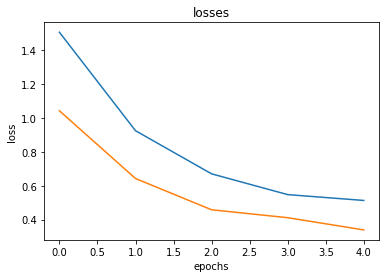

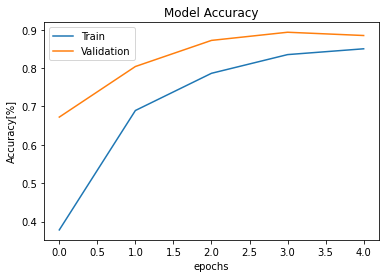

accuracy= 0.8703292846679688


In [90]:
plt.plot(history.history['loss'], label = "Train") 
plt.plot(history.history['val_loss'], label = "Validation")
plt.title("losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()
plt.plot(history.history['accuracy'], label = "Train")
plt.plot(history.history['val_accuracy'], label = "Validation") 
plt.title("Model Accuracy")
plt.xlabel("epochs")
plt.ylabel("Accuracy[%]")
plt.legend()
plt.show()

print('accuracy=',((acc[0]+acc[1]+acc[2]+acc[3]+acc[4])/5))


In [91]:
from sklearn.metrics import classification_report
predictions = model.predict(x_test2)
predictions[0]
print(len(predictions))


pred=[]
for i in range(235):
	predictions[i]
	A=np.argmax(predictions[i])
	pred.append(A)
print(classification_report(pred,y_test,target_names=CATEGORIES))



235
              precision    recall  f1-score   support

     central       0.72      0.94      0.82        31
  hemianopia       0.88      0.92      0.90        39
      normal       0.97      0.76      0.85        37
 quadratopia       0.94      0.94      0.94        48
    superior       1.00      0.89      0.94        47
      turnel       0.80      0.85      0.82        33

    accuracy                           0.89       235
   macro avg       0.88      0.88      0.88       235
weighted avg       0.90      0.89      0.89       235

